<a href="https://colab.research.google.com/github/sancia15/PoeGen_LSTM/blob/master/PoemGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

Dataset Analysis

In [ ]:
data=open('/poemgen1.txt').read()

Converting the text to lowercase and splitting it 


NLP

In [ ]:
corpus = data.lower().split("\n")

Tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)


2032


In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Building the model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))



Compiling the model

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 100)           203200    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 15, 300)           301200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 300)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 1016)              102616    
_________________________________________________________________
dense_7 (Dense)              (None, 2032)              2066544   
Total params: 2,833,960
Trainable params: 2,833,960
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
234/234 [==============================] - 24s 101ms/step - loss: 6.8992 - accuracy: 0.0584
Epoch 2/100
234/234 [==============================] - 24s 101ms/step - loss: 6.2212 - accuracy: 0.0617
Epoch 3/100
234/234 [==============================] - 23s 100ms/step - loss: 6.0476 - accuracy: 0.0643
Epoch 4/100
234/234 [==============================] - 23s 100ms/step - loss: 5.9334 - accuracy: 0.0710
Epoch 5/100
234/234 [==============================] - 24s 101ms/step - loss: 5.8454 - accuracy: 0.0732
Epoch 6/100
234/234 [==============================] - 24s 101ms/step - loss: 5.7562 - accuracy: 0.0812
Epoch 7/100
234/234 [==============================] - 23s 99ms/step - loss: 5.6706 - accuracy: 0.0874
Epoch 8/100
234/234 [==============================] - 23s 100ms/step - loss: 5.5768 - accuracy: 0.0940
Epoch 9/100
234/234 [==============================] - 23s 100ms/step - loss: 5.4855 - accuracy: 0.0978
Epoch 10/100
234/234 [==============================] - 23s 100ms

Plotting graph

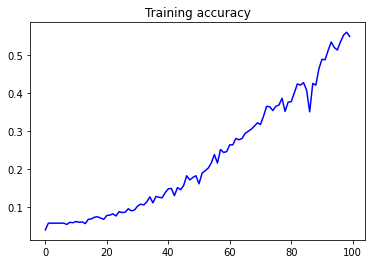

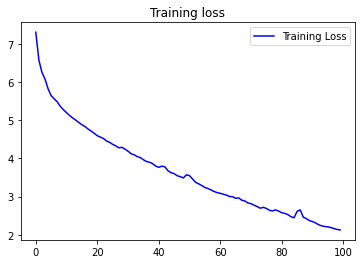

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Come unto these yellow sands,And then take hands:"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Come unto these yellow sands,And then take hands: that right with old rosin the bow is feegee so powerful and able and know her god when he sets and the meadow that is right across the sea is bare the rose horse with old rosin the bow fought the rocky road to dublin whack wished can not home than she safely father thou art remain him in me from me and i spent in halfway to dublin athy in a sea and love the sea and the moon are arms and i would see me one kathleen dear thee well for some endearing decay when i was a
